## Load data

In [1]:
import pandas as pd

# use a subset of columns, for simplicity
columns = [
    "Unique Key",
    "Created Date",
    "Closed Date",
    "Complaint Type",
    "Borough",
    "Incident Zip",
    "Agency",
    "Latitude",
    "Longitude"
]
df = pd.read_csv("311_jun_2019.csv", index_col="Unique Key", parse_dates=["Created Date", "Closed Date"], usecols=columns)

df

,Created Date,Closed Date,Agency,Complaint Type,Incident Zip,Borough,Latitude,Longitude
Unique Key,,,,,,,,
42835642,2019-06-01,2019-06-06,DOHMH,Standing Water,11216.0,BROOKLYN,40.690386,-73.946993
42835653,2019-06-01,2019-06-04,DOHMH,Standing Water,11238.0,BROOKLYN,40.676097,-73.961353
42836734,2019-06-01,2019-06-04,DOHMH,Standing Water,11238.0,BROOKLYN,40.676182,-73.961760
42836735,2019-06-01,2019-06-06,DOHMH,Standing Water,11220.0,BROOKLYN,40.639201,-74.028869
42837925,2019-06-01,2019-06-06,DOHMH,Standing Water,11204.0,BROOKLYN,40.621854,-73.983902
...,...,...,...,...,...,...,...,...
42914357,2019-06-08,2019-06-20,DOHMH,Standing Water,11229.0,BROOKLYN,40.602188,-73.937376
42915719,2019-06-08,2019-06-18,DOHMH,Standing Water,10016.0,MANHATTAN,40.749982,-73.980424
42915727,2019-06-08,2019-06-10,DOHMH,Standing Water,11231.0,BROOKLYN,40.682342,-74.001096


## Column info

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61656 entries, 42835642 to 42917164
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Created Date    61656 non-null  datetime64[ns]
 1   Closed Date     60159 non-null  datetime64[ns]
 2   Agency          61656 non-null  object        
 3   Complaint Type  61656 non-null  object        
 4   Incident Zip    59746 non-null  float64       
 5   Borough         61639 non-null  object        
 6   Latitude        57929 non-null  float64       
 7   Longitude       57929 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 4.2+ MB


The different `Non-Null Count`s show that we do in fact have nulls.

## [Show rows with nulls](https://stackoverflow.com/a/43424223/358804)

In [3]:
df[df.isna().any(axis=1)]

,Created Date,Closed Date,Agency,Complaint Type,Incident Zip,Borough,Latitude,Longitude
Unique Key,,,,,,,,
42830048,2019-06-01 00:07:31,2019-06-01 08:47:21,DPR,Animal in a Park,11215.0,BROOKLYN,NaN,NaN
42826955,2019-06-01 00:11:00,2019-06-01 01:20:00,DOT,Traffic Signal Condition,NaN,MANHATTAN,NaN,NaN
42824058,2019-06-01 00:19:36,2019-07-29 12:18:08,NYPD,Noise - Residential,NaN,Unspecified,NaN,NaN
42828613,2019-06-01 00:47:22,2019-06-01 01:20:09,NYPD,Noise - Vehicle,10040.0,MANHATTAN,NaN,NaN
42830273,2019-06-01 00:48:38,2019-06-02 00:52:01,HPD,HPD Literature Request,NaN,Unspecified,NaN,NaN
...,...,...,...,...,...,...,...,...
42904011,2019-06-07 23:47:54,NaT,TLC,For Hire Vehicle Complaint,10003.0,MANHATTAN,40.728360,-73.99076
42905749,2019-06-07 23:49:30,2019-06-08 00:36:20,NYPD,Noise - Residential,10024.0,MANHATTAN,NaN,NaN
42903487,2019-06-07 23:53:03,2019-06-24 07:18:52,DOT,Street Sign - Damaged,10304.0,STATEN ISLAND,NaN,NaN


## [Show a histogram](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

Let's look at the distribution of `Created Date`s:

array([[<AxesSubplot:title={'center':'Created Date'}>]], dtype=object)

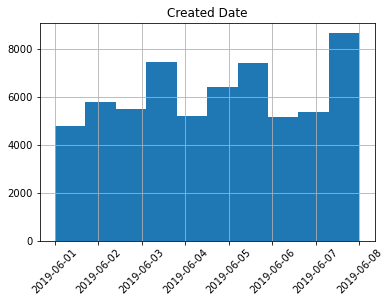

In [4]:
df.hist("Created Date", xrot=45)

## Unique values

In [5]:
# pd.set_option("display.min_rows", 100)

counts = df["Complaint Type"].value_counts()
counts

Noise - Residential                    5559
Request Large Bulky Item Collection    4990
Illegal Parking                        4540
Noise - Street/Sidewalk                4163
Blocked Driveway                       2787
                                       ... 
Misc. Comments' and '1618'=...            1
Misc. Comments' waitfor del...            1
Misc. Comments' and '7835'=...            1
Misc. Comments88909845' or ...            1
%c0%ae/%c0%ae/WEB-INF/web.xml             1
Name: Complaint Type, Length: 298, dtype: int64

We see a bunch of junk values that appear infrequently.

### Exclude junk

In [6]:
one_offs_complaint_types = counts[counts == 1].index
list(one_offs_complaint_types)

['Misc. Comments]]&gt;&gt;&lt;',
 './validate_form.php',
 '/./validate_form.php',
 '.../Misc. Comments',
 '*)(!(objectClass=*)',
 '..././..././..././..././......',
 '*)(objectClass=*',
 'g0oii1s4s5)(objectClass=*',
 '&lt;vlv xmlns=&quot;http://...',
 'idexf3mrb7)(!(objectClass=*)',
 '&lt;odb xmlns:xi=&quot;http...',
 '%2e%2e%2f%2e%2e%2f%2e%2e%2f...',
 'file:///c:/windows/win.ini',
 "Misc. Comments'|echo y9v6fc...",
 '/etc/passwd',
 'c:\\windows\\win.ini Misc. Co...',
 '...\\.\\...\\.\\...\\.\\...\\.\\......',
 '\\windows\\win.ini',
 'c:\\windows\\win.ini',
 '$(sleep 11)',
 '%2e%2e%5c%2e%2e%5c%2e%2e%5c...',
 "Misc. Comments'|ping -c 21 ...",
 '...\\./...\\./...\\./...\\./......',
 '.../.\\.../.\\.../.\\.../.\\......',
 'Misc. Comments&gt;  BCC:bl0...',
 '%{(#dm=@ognl.OgnlContext@DE...',
 '%{4761*8506}',
 'bcd9&lt;!--esi--&gt;1ggp&lt...',
 '../../../WEB-INF/web.xml;x=',
 '%2fetc%2fpasswd',
 '.../....///.../....///.../....',
 '../../WEB-INF/web.xml',
 '%E5%98%8A%E5%98%8DX-Injecti...',
 '%

Keep everything that isn't a one-off `Complaint Type`.

In [7]:
one_off_requests = df["Complaint Type"].isin(one_offs_complaint_types)
cleaned = df[~one_off_requests]
cleaned

,Created Date,Closed Date,Agency,Complaint Type,Incident Zip,Borough,Latitude,Longitude
Unique Key,,,,,,,,
42835642,2019-06-01,2019-06-06,DOHMH,Standing Water,11216.0,BROOKLYN,40.690386,-73.946993
42835653,2019-06-01,2019-06-04,DOHMH,Standing Water,11238.0,BROOKLYN,40.676097,-73.961353
42836734,2019-06-01,2019-06-04,DOHMH,Standing Water,11238.0,BROOKLYN,40.676182,-73.961760
42836735,2019-06-01,2019-06-06,DOHMH,Standing Water,11220.0,BROOKLYN,40.639201,-74.028869
42837925,2019-06-01,2019-06-06,DOHMH,Standing Water,11204.0,BROOKLYN,40.621854,-73.983902
...,...,...,...,...,...,...,...,...
42914357,2019-06-08,2019-06-20,DOHMH,Standing Water,11229.0,BROOKLYN,40.602188,-73.937376
42915719,2019-06-08,2019-06-18,DOHMH,Standing Water,10016.0,MANHATTAN,40.749982,-73.980424
42915727,2019-06-08,2019-06-10,DOHMH,Standing Water,11231.0,BROOKLYN,40.682342,-74.001096
